In [1]:
import numpy as np
import tqdm
import os

In [2]:
train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:31<00:00, 1128.38it/s]

train : 32298, eval :3589


Angry


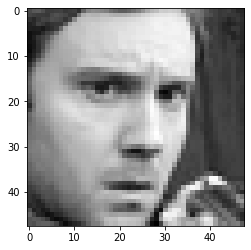

In [3]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [4]:
import tensorflow as tf

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [5]:
#model.fit
EPOCHS = 21

history = model.fit(np.stack(train_x),
                    tf.keras.utils.to_categorical(train_y),
                    epochs= EPOCHS,
                    batch_size=128,
                    validation_data=(np.stack(eval_x), tf.keras.utils.to_categorical(eval_y)))

Epoch 1/21
253/253 [==============================] - 90s 354ms/step - loss: 1.7827 - categorical_accuracy: 0.2702 - val_loss: 1.9110 - val_categorical_accuracy: 0.1655
Epoch 2/21
253/253 [==============================] - 26s 103ms/step - loss: 1.5893 - categorical_accuracy: 0.3784 - val_loss: 1.9052 - val_categorical_accuracy: 0.1655
Epoch 3/21
253/253 [==============================] - 26s 104ms/step - loss: 1.4650 - categorical_accuracy: 0.4354 - val_loss: 1.8947 - val_categorical_accuracy: 0.1655
Epoch 4/21
253/253 [==============================] - 26s 103ms/step - loss: 1.3781 - categorical_accuracy: 0.4735 - val_loss: 1.8975 - val_categorical_accuracy: 0.1655
Epoch 5/21
253/253 [==============================] - 26s 103ms/step - loss: 1.2954 - categorical_accuracy: 0.5078 - val_loss: 1.8942 - val_categorical_accuracy: 0.1655
Epoch 6/21
253/253 [==============================] - 26s 103ms/step - loss: 1.2334 - categorical_accuracy: 0.5314 - val_loss: 1.9025 - val_categorical_acc

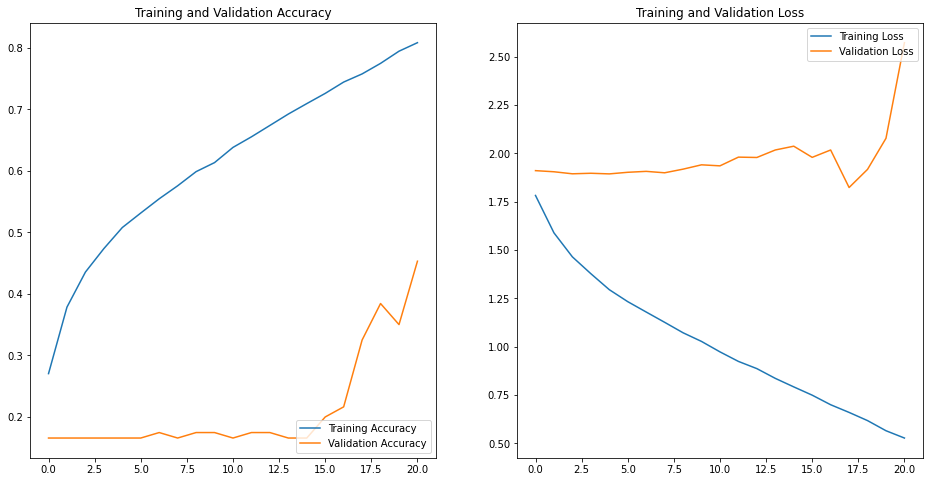

In [6]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

EPOCHS = 100일때 그래프.
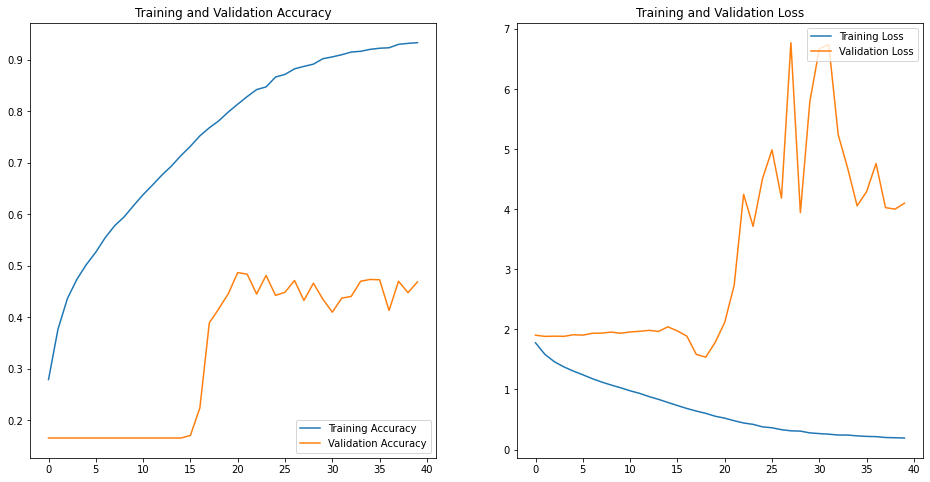
이를 통해 EPOCHS를 설정하였다

In [8]:
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

문제점 1. 너무 느린 초기 학습 속도
문제점 2. 줄어들지 않는 Validation Loss
문제점 3. epoch 15를 기점으로 validation accuracy는 50%에 근접하게 증가하지만 이후 변화가 없다.
문제점 4. 웹에서 입력데이터가 모델에서 학습한 데이터와 큰 차이가 있다.

url : https://hongdune.github.io/tfjs_mobile

# 총평
모바일을 통해서 작동하지 않는 문제가 발생했지만 index.html파일의 문제임을 찾을 수 있었다. git update에서 index.html이 정상적으로 업데이트 되지 않는 원인은 찾아내지 못했다.
모델 역시 초기 학습 속도가 epoch 15까지 거의 진행되지 않다가 epoch 20 이후부터 다시 횡보하는 문제가 발생하였다.
초기 학습 속도 개선을 위해선 batch size를 조정하면 되지만 개개의 epoch 속도가 더 느려 오히려 전체 소요시간이 더 길어지는 문제가 있었다.
최대 정확도의 경우에는 얼굴 부분만을 인식하는 방법을 통해서 해결할 수 있지만 웹에서 face recognition을 적용할 방법을 찾지 못하였다.